In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score,recall_score,f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import warnings 
warnings.filterwarnings('ignore')

In [2]:
creditcard = pd.read_csv("C:\\Users\\Zara\\Desktop\\Credit Card Fraud\\creditcard.csv")

print(creditcard.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
import seaborn as sns

plt.figure(figsize=(20,5))
sns.distplot(creditcard[['Time']], axlabel = 'Time')

In [ ]:
plt.figure(figsize=(10,5))
plt.xlim([0, 2000])
sns.distplot(creditcard[['Amount']], axlabel = 'Amount')


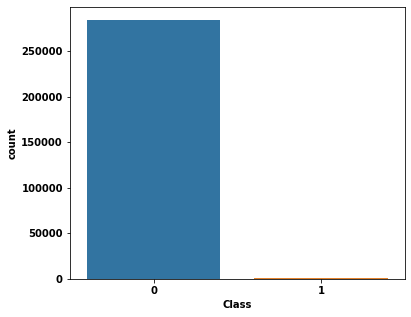

In [16]:
plt.figure(figsize=(6,5))

sns.countplot(x = 'Class',  data = creditcard)
#plt.legend('Class', ncol=2, loc='upper right')

In [15]:
Fraud = creditcard[creditcard['Class'] == 1]
Valid = creditcard[creditcard['Class'] == 0]

print('Fraud Cases:',(len(Fraud)))
print('Valid Transactions:', (len(Valid)))

Fraud Cases: 492
Valid Transactions: 284315


In [ ]:
corrmat = creditcard.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
creditcard.hist(figsize = (22, 20), bins = 20)
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

creditcard['normalizedAmount'] = StandardScaler().fit_transform(creditcard['Amount'].values.reshape(-1,1))
creditcard = creditcard.drop(['Amount'],axis=1)
creditcard= creditcard.drop(['Time'],axis=1)
creditcard.head()




,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [4]:
x = creditcard.drop(columns = ['Class'], axis = 1)
y= creditcard[['Class']]


In [5]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets

#use cross validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


# Random Forest

In [94]:


rfc = RandomForestClassifier()

params = {'n_estimators': [5,10,15],
               'min_samples_split': [2,5,7],
               'min_samples_leaf': [1,2,4],
         'random_state': [0]}

rfc_grid = GridSearchCV(rfc, params, cv = 3, verbose = 2)
rfc_fit = rfc_grid.fit(x_train, y_train)
score = rfc_grid.score(x_test, y_test)
print('Best Parameters: ', rfc_fit.best_params_)
print('Score: ',score)




Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] min_samples_leaf=1, min_samples_split=2, n_estimators=5, random_state=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_leaf=1, min_samples_split=2, n_estimators=5, random_state=0, total=  10.5s
[CV] min_samples_leaf=1, min_samples_split=2, n_estimators=5, random_state=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=2, n_estimators=5, random_state=0, total=   9.8s
[CV] min_samples_leaf=1, min_samples_split=2, n_estimators=5, random_state=0 
[CV]  min_samples_leaf=1, min_samples_split=2, n_estimators=5, random_state=0, total=  11.0s
[CV] min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=0 
[CV]  min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=0, total=  19.1s
[CV] min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=0 
[CV]  min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=0, total=  19.1s
[CV] min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=0 
[CV]  min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=0, total=  21.3s
[CV] min_samples_leaf=1, min_samples_split=2, n_estimators=15, random_state=0 
[CV]  min_samples_leaf=1, min_samples_split=2, n_estimators=15, random_state=0, total=  27.7s
[CV] min_samples_leaf=1, min_samples_split=2

[CV]  min_samples_leaf=2, min_samples_split=7, n_estimators=10, random_state=0, total=  19.2s
[CV] min_samples_leaf=2, min_samples_split=7, n_estimators=10, random_state=0 
[CV]  min_samples_leaf=2, min_samples_split=7, n_estimators=10, random_state=0, total=  20.2s
[CV] min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=0 
[CV]  min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=0, total=  27.1s
[CV] min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=0 
[CV]  min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=0, total=  30.0s
[CV] min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=0 
[CV]  min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=0, total=  30.7s
[CV] min_samples_leaf=4, min_samples_split=2, n_estimators=5, random_state=0 
[CV]  min_samples_leaf=4, min_samples_split=2, n_estimators=5, random_state=0, total=   9.2s
[CV] min_samples_leaf=4, min_samples_split=

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 26.6min finished


Best Parameters:  {'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 15, 'random_state': 0}
Score:  0.9995786664794073


In [13]:

rfc2 = RandomForestClassifier(min_samples_leaf = 2, min_samples_split = 7, n_estimators = 15, random_state = 0)
rfc2.fit(x_train,y_train)
y_pred_rfc = rfc2.predict(x_test)

In [14]:
acc_rfc = accuracy_score(y_test, y_pred_rfc)
prec_rfc= precision_score(y_test,y_pred_rfc)
rec_rfc= recall_score(y_test,y_pred_rfc)
f1_rfc= f1_score(y_test,y_pred_rfc)
rmse_rfc = np.sqrt(mean_squared_error(y_test, y_pred_rfc))

proba_rfc = rfc2.predict_proba(x_test)

print('Accuracy: ', acc_rfc)
print('Precision: ', prec_rfc)
print('Recall: ', rec_rfc)
print('F1 Score: ', f1_rfc)
print('RMSE: ', rmse_rfc)

Accuracy:  0.9995786664794073
Precision:  0.9310344827586207
Recall:  0.7941176470588235
F1 Score:  0.8571428571428571
RMSE:  0.020526410319212558


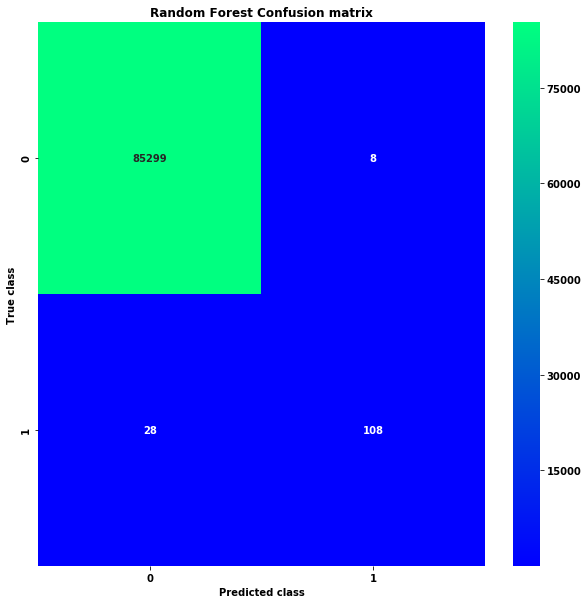

In [15]:
labels = ['Valid', 'Fraud']
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(10,10))
sns.heatmap(cm_rfc,annot=True, fmt="d", cmap = 'winter')
plt.title('Random Forest Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


# Decision Tree

In [192]:



dtc = DecisionTreeClassifier()

params = {'max_depth': [2,4,10], 'min_samples_split':[2,3,4,6,8,10], 'random_state': [0]}

clf_dtc = GridSearchCV(dtc, params, cv = 3)

dtc_fit= clf_dtc.fit(x_train, y_train)

score = clf_dtc.score(x_test, y_test)

print('Best Parameters: ', dtc_fit.best_params_)

print('Score: ',score)

Best Parameters:  {'max_depth': 4, 'min_samples_split': 6}
Score:  0.9994733330992591


In [16]:
#using best parameters
dtc2 = DecisionTreeClassifier(max_depth= 4, min_samples_split= 6, random_state= 0)
dtc2.fit(x_train, y_train)
dtc2_score = dtc2.score(x_test, y_test)
y_pred_dtc = dtc2.predict(x_test)

In [17]:
prec_dtc= precision_score(y_test,y_pred_dtc)
rec_dtc= recall_score(y_test,y_pred_dtc)
f1_dtc= f1_score(y_test,y_pred_dtc)
rmse_dtc = np.sqrt(mean_squared_error(y_test, y_pred_dtc))

proba_dtc = dtc2.predict_proba(x_test)


print('Score: ', dtc2_score)
print('Precision: ', prec_dtc)
print('Recall: ', rec_dtc)
print('F1 Score: ', f1_dtc)
print('RMSE: ', rmse_dtc)

Score:  0.9994148145547324
Precision:  0.864406779661017
Recall:  0.75
F1 Score:  0.8031496062992127
RMSE:  0.024190606550221212


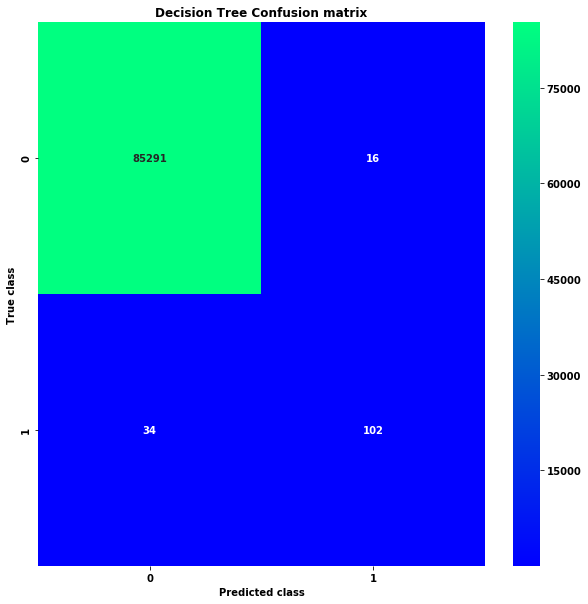

In [18]:
labels = ['Valid', 'Fraud']
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
plt.figure(figsize=(10,10))
sns.heatmap(cm_dtc,annot=True, fmt="d", cmap = 'winter')
plt.title('Decision Tree Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


# Gradient Boosting Classifier


In [9]:


gdc = GradientBoostingClassifier()

params = {'n_estimators': [5,10,15],
               'min_samples_split': [2,5,6,7],
               'min_samples_leaf': [2,4,6,8],
         'learning_rate': [0.01, 0.1], 'random_state': [0]}

gdc_grid = GridSearchCV(gdc, params, cv = 3, verbose = 2)
gdc_fit = gdc_grid.fit(x_train, y_train)
score = gdc_grid.score(x_test, y_test)
print('Best Parameters: ', gdc_fit.best_params_)
print('Score: ',score)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=5, random_state=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=5, random_state=0, total=  19.7s
[CV] learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=5, random_state=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.6s remaining:    0.0s


[CV]  learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=5, random_state=0, total=  20.2s
[CV] learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=5, random_state=0 
[CV]  learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=5, random_state=0, total=  21.5s
[CV] learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=10, random_state=0 
[CV]  learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=10, random_state=0, total=  41.6s
[CV] learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=10, random_state=0 
[CV]  learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=10, random_state=0, total=  39.6s
[CV] learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=10, random_state=0 
[CV]  learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=10, random_state=0, total=  35.8s
[CV] learning_rate=0.01, min_samples_

[CV]  learning_rate=0.01, min_samples_leaf=4, min_samples_split=2, n_estimators=10, random_state=0, total=  34.6s
[CV] learning_rate=0.01, min_samples_leaf=4, min_samples_split=2, n_estimators=10, random_state=0 
[CV]  learning_rate=0.01, min_samples_leaf=4, min_samples_split=2, n_estimators=10, random_state=0, total=  34.5s
[CV] learning_rate=0.01, min_samples_leaf=4, min_samples_split=2, n_estimators=15, random_state=0 
[CV]  learning_rate=0.01, min_samples_leaf=4, min_samples_split=2, n_estimators=15, random_state=0, total=  53.2s
[CV] learning_rate=0.01, min_samples_leaf=4, min_samples_split=2, n_estimators=15, random_state=0 
[CV]  learning_rate=0.01, min_samples_leaf=4, min_samples_split=2, n_estimators=15, random_state=0, total=  51.4s
[CV] learning_rate=0.01, min_samples_leaf=4, min_samples_split=2, n_estimators=15, random_state=0 
[CV]  learning_rate=0.01, min_samples_leaf=4, min_samples_split=2, n_estimators=15, random_state=0, total=  52.1s
[CV] learning_rate=0.01, min_sampl

[CV]  learning_rate=0.01, min_samples_leaf=6, min_samples_split=2, n_estimators=15, random_state=0, total=  55.4s
[CV] learning_rate=0.01, min_samples_leaf=6, min_samples_split=2, n_estimators=15, random_state=0 
[CV]  learning_rate=0.01, min_samples_leaf=6, min_samples_split=2, n_estimators=15, random_state=0, total=  54.3s
[CV] learning_rate=0.01, min_samples_leaf=6, min_samples_split=5, n_estimators=5, random_state=0 
[CV]  learning_rate=0.01, min_samples_leaf=6, min_samples_split=5, n_estimators=5, random_state=0, total=  18.2s
[CV] learning_rate=0.01, min_samples_leaf=6, min_samples_split=5, n_estimators=5, random_state=0 
[CV]  learning_rate=0.01, min_samples_leaf=6, min_samples_split=5, n_estimators=5, random_state=0, total=  19.2s
[CV] learning_rate=0.01, min_samples_leaf=6, min_samples_split=5, n_estimators=5, random_state=0 
[CV]  learning_rate=0.01, min_samples_leaf=6, min_samples_split=5, n_estimators=5, random_state=0, total=  20.2s
[CV] learning_rate=0.01, min_samples_lea

[CV]  learning_rate=0.01, min_samples_leaf=8, min_samples_split=5, n_estimators=5, random_state=0, total=  16.4s
[CV] learning_rate=0.01, min_samples_leaf=8, min_samples_split=5, n_estimators=5, random_state=0 
[CV]  learning_rate=0.01, min_samples_leaf=8, min_samples_split=5, n_estimators=5, random_state=0, total=  16.5s
[CV] learning_rate=0.01, min_samples_leaf=8, min_samples_split=5, n_estimators=10, random_state=0 
[CV]  learning_rate=0.01, min_samples_leaf=8, min_samples_split=5, n_estimators=10, random_state=0, total=  31.6s
[CV] learning_rate=0.01, min_samples_leaf=8, min_samples_split=5, n_estimators=10, random_state=0 
[CV]  learning_rate=0.01, min_samples_leaf=8, min_samples_split=5, n_estimators=10, random_state=0, total=  33.0s
[CV] learning_rate=0.01, min_samples_leaf=8, min_samples_split=5, n_estimators=10, random_state=0 
[CV]  learning_rate=0.01, min_samples_leaf=8, min_samples_split=5, n_estimators=10, random_state=0, total=  31.7s
[CV] learning_rate=0.01, min_samples_

[CV]  learning_rate=0.1, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=0, total=  38.2s
[CV] learning_rate=0.1, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=0 
[CV]  learning_rate=0.1, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=0, total=  32.6s
[CV] learning_rate=0.1, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=0 
[CV]  learning_rate=0.1, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=0, total=  49.5s
[CV] learning_rate=0.1, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=0 
[CV]  learning_rate=0.1, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=0, total=  51.4s
[CV] learning_rate=0.1, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=0 
[CV]  learning_rate=0.1, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=0, total=  55.8s
[CV] learning_rate=0.1, min_samples_leaf=2,

[CV]  learning_rate=0.1, min_samples_leaf=4, min_samples_split=5, n_estimators=15, random_state=0, total=  48.2s
[CV] learning_rate=0.1, min_samples_leaf=4, min_samples_split=5, n_estimators=15, random_state=0 
[CV]  learning_rate=0.1, min_samples_leaf=4, min_samples_split=5, n_estimators=15, random_state=0, total=  49.8s
[CV] learning_rate=0.1, min_samples_leaf=4, min_samples_split=6, n_estimators=5, random_state=0 
[CV]  learning_rate=0.1, min_samples_leaf=4, min_samples_split=6, n_estimators=5, random_state=0, total=  18.0s
[CV] learning_rate=0.1, min_samples_leaf=4, min_samples_split=6, n_estimators=5, random_state=0 
[CV]  learning_rate=0.1, min_samples_leaf=4, min_samples_split=6, n_estimators=5, random_state=0, total=  18.9s
[CV] learning_rate=0.1, min_samples_leaf=4, min_samples_split=6, n_estimators=5, random_state=0 
[CV]  learning_rate=0.1, min_samples_leaf=4, min_samples_split=6, n_estimators=5, random_state=0, total=  17.9s
[CV] learning_rate=0.1, min_samples_leaf=4, min_s

[CV]  learning_rate=0.1, min_samples_leaf=6, min_samples_split=6, n_estimators=5, random_state=0, total=  14.1s
[CV] learning_rate=0.1, min_samples_leaf=6, min_samples_split=6, n_estimators=5, random_state=0 
[CV]  learning_rate=0.1, min_samples_leaf=6, min_samples_split=6, n_estimators=5, random_state=0, total=  13.8s
[CV] learning_rate=0.1, min_samples_leaf=6, min_samples_split=6, n_estimators=10, random_state=0 
[CV]  learning_rate=0.1, min_samples_leaf=6, min_samples_split=6, n_estimators=10, random_state=0, total=  26.9s
[CV] learning_rate=0.1, min_samples_leaf=6, min_samples_split=6, n_estimators=10, random_state=0 
[CV]  learning_rate=0.1, min_samples_leaf=6, min_samples_split=6, n_estimators=10, random_state=0, total=  27.7s
[CV] learning_rate=0.1, min_samples_leaf=6, min_samples_split=6, n_estimators=10, random_state=0 
[CV]  learning_rate=0.1, min_samples_leaf=6, min_samples_split=6, n_estimators=10, random_state=0, total=  27.2s
[CV] learning_rate=0.1, min_samples_leaf=6, mi

[CV]  learning_rate=0.1, min_samples_leaf=8, min_samples_split=6, n_estimators=10, random_state=0, total=  27.4s
[CV] learning_rate=0.1, min_samples_leaf=8, min_samples_split=6, n_estimators=10, random_state=0 
[CV]  learning_rate=0.1, min_samples_leaf=8, min_samples_split=6, n_estimators=10, random_state=0, total=  27.0s
[CV] learning_rate=0.1, min_samples_leaf=8, min_samples_split=6, n_estimators=15, random_state=0 
[CV]  learning_rate=0.1, min_samples_leaf=8, min_samples_split=6, n_estimators=15, random_state=0, total=  40.8s
[CV] learning_rate=0.1, min_samples_leaf=8, min_samples_split=6, n_estimators=15, random_state=0 
[CV]  learning_rate=0.1, min_samples_leaf=8, min_samples_split=6, n_estimators=15, random_state=0, total=  40.7s
[CV] learning_rate=0.1, min_samples_leaf=8, min_samples_split=6, n_estimators=15, random_state=0 
[CV]  learning_rate=0.1, min_samples_leaf=8, min_samples_split=6, n_estimators=15, random_state=0, total=  40.6s
[CV] learning_rate=0.1, min_samples_leaf=8,

[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 171.9min finished


Best Parameters:  {'learning_rate': 0.1, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 15, 'random_state': 0}
Score:  0.9986072586402631


In [10]:
from sklearn.ensemble import GradientBoostingClassifier

gdc2 = GradientBoostingClassifier(learning_rate = 0.1, min_samples_leaf = 6, min_samples_split = 2, n_estimators =15, random_state= 0)
gdc2.fit(x_train, y_train)
gdc_score = gdc2.score(x_test, y_test)
y_pred_gdc = gdc2.predict(x_test)

In [11]:
rmse_gdc= np.sqrt(mean_squared_error(y_test,y_pred_gdc))
acc_gdc= accuracy_score(y_test,y_pred_gdc)
prec_gdc = precision_score(y_test, y_pred_gdc)
f1_gdc = f1_score(y_test, y_pred_gdc)
recall_gdc = recall_score(y_test, y_pred_gdc)
proba_gdc = gdc2.predict_proba(x_test)


print('Score: ', acc_gdc)
print('Precision: ', prec_gdc)
print('Recall: ', recall_gdc)
print('F1 Score: ', f1_gdc)
print('RMSE: ', rmse_gdc)

Score:  0.9986072586402631
Precision:  0.8695652173913043
Recall:  0.14705882352941177
F1 Score:  0.25157232704402516
RMSE:  0.037319450153196265


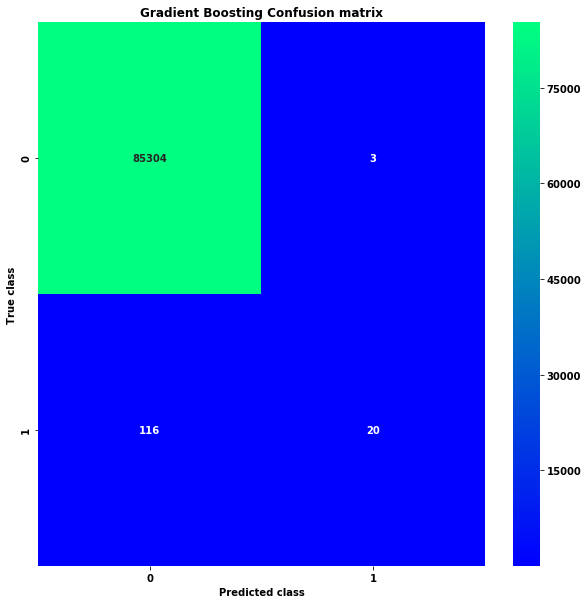

In [12]:
labels = ['Valid', 'Fraud']
cm_gdc = confusion_matrix(y_test, y_pred_gdc)
plt.figure(figsize=(10,10))
sns.heatmap(cm_gdc,annot=True, fmt="d", cmap = 'winter')
plt.title('Gradient Boosting Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# NN

In [47]:
import keras
from keras.models import Sequential
from keras.layers import Dense



In [ ]:
# Initialising the ANN
classifier = Sequential()# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 29)) #Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))# Compiling the ANN
classifier.compile(optimizer = 'SGD', loss = 'mean_squared_error', metrics = ['accuracy'])# Fitting the ANN to the Training set
model1 = classifier.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_data=(x_test, y_test))

In [54]:
y_pred_nn = classifier.predict(x_test).ravel()

proba_nn = classifier.predict_proba(x_test).ravel()

score = classifier.evaluate(x_test, y_test)
score

85443/85443 [==============================] - 3s 37us/step


[0.0015901159894153034, 0.998408317565918]

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_acc']

epoch = range(len(acc))

plt.plot(acc, epoch, figsize = (10,15))

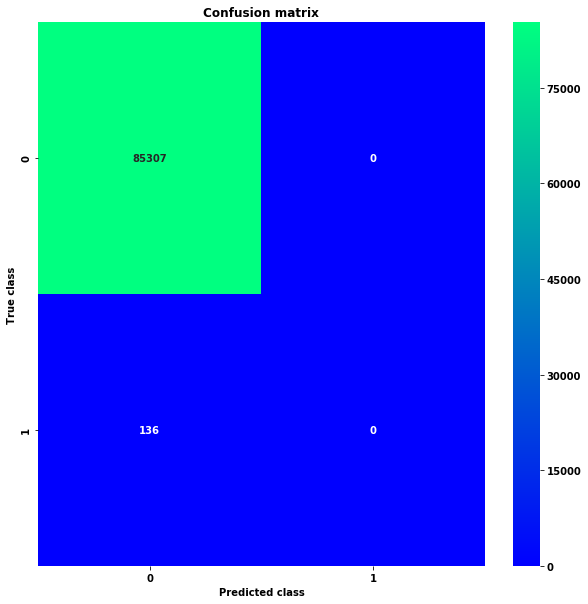

In [56]:
labels = ['Valid', 'Fraud']
cm_gdc = confusion_matrix(y_test, y_pred_nn.round(), normalize = False)
plt.figure(figsize=(10,10))
sns.heatmap(cm_gdc,annot=True, fmt="d", cmap = 'winter')
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [87]:
y_classes = classifier.predict_classes(x_test)
print('Accuracy: ', accuracy_score(y_test, y_classes))

Accuracy:  0.9984082955888721


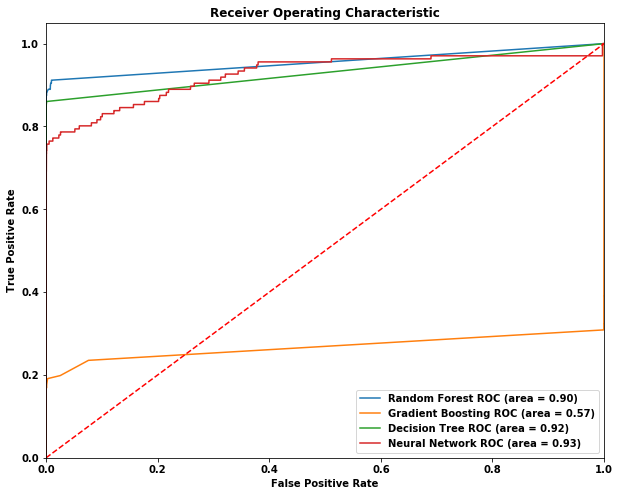

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(figsize=(10,8))

models = [{
    'label': 'Random Forest',
    'model': rfc2,
    'y_score': proba_rfc[:,1],
    'y_pred':y_pred_rfc},
{
    'label': 'Gradient Boosting',
    'model': gdc2,
    'y_score': proba_gdc[:,1],
    'y_pred':y_pred_gdc},
{
    'label': 'Decision Tree',
    'model': dtc2,
    'y_score': proba_dtc[:,1],
    'y_pred':y_pred_dtc},
{
    'label': 'Neural Network',
    'model': classifier,
    'y_score': proba_nn,
    'y_pred':y_pred_nn }]

for m in models:
    model = m['model']

    fpr, tpr, thresholds = roc_curve(y_test, m['y_score'])
#
    auc = roc_auc_score(y_test,m['y_pred'])

    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
plt
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [19]:
results = pd.DataFrame([['Random Forest', acc_rfc, prec_rfc, rec_rfc, f1_rfc, rmse_rfc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'RMSE'])
dtc_results = pd.DataFrame([['Decision Tree', dtc2_score, prec_dtc, rec_dtc, f1_dtc, rmse_dtc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'RMSE'])

gdc_results = pd.DataFrame([['Gradient Boosting', gdc_score, prec_gdc, recall_gdc, f1_gdc, rmse_gdc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'RMSE'])


results = results.append(dtc_results, ignore_index = True)
results = results.append( gdc_results, ignore_index = True)

results

,Model,Accuracy,Precision,Recall,F1 Score,RMSE
0,Random Forest,0.999579,0.931034,0.794118,0.857143,0.020526
1,Decision Tree,0.999415,0.864407,0.750000,0.803150,0.024191
2,Gradient Boosting,0.998607,0.869565,0.147059,0.251572,0.037319
